In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm

In [2]:
df_train = pd.read_csv('F://Uni/991/Pattern/SPR_HW4/inputs/P6/ALS_train.csv')

In [3]:
#df_train.head()

## a.

In [4]:
df = df_train.drop(columns=['ID', 'ALSFRS_slope'])

In [5]:
#calculating correlation coefficient
cor = df.corrwith(df_train['ALSFRS_slope'])

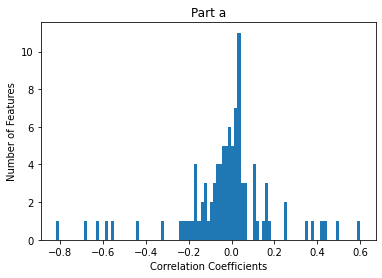

In [6]:
#plotting correlation coefficients histogram
_ = plt.hist(cor, cor.size)
plt.title('Part a')
plt.xlabel('Correlation Coefficients')
plt.ylabel('Number of Features')
plt.show()

In [7]:
#sorting the absolute of correlation coefficients
cor2 = pd.Series.sort_values(np.absolute(cor))
#print(cor2)

In [8]:
#finding the ten best features
print(cor2[-10:][::-1])
best_features = cor2.index[-10:][::-1]
print('Best Features:\n', best_features)

ALSFRS_Total_range    0.819305
trunk_range           0.686407
hands_range           0.632350
ALSFRS_Total_min      0.601810
leg_range             0.584507
mouth_range           0.553194
trunk_min             0.488530
mouth_min             0.435538
respiratory_range     0.432878
hands_min             0.424107
dtype: float64
Best Features:
 Index(['ALSFRS_Total_range', 'trunk_range', 'hands_range', 'ALSFRS_Total_min',
       'leg_range', 'mouth_range', 'trunk_min', 'mouth_min',
       'respiratory_range', 'hands_min'],
      dtype='object')


In [9]:
df_best = df_train[best_features]

In [10]:
#df_best.head()

## b.

In [11]:
#calculating kmeans score for different 'k's
sil_rand = list()
distortions_rand = list()
for k in range(2,25):
    kmeans_rand = KMeans(n_clusters=k, init='random', random_state=0).fit(df_best)
    sil_rand.append(silhouette_score(kmeans_rand.transform(df_best),kmeans_rand.predict(df_best)))
    distortions_rand.append(kmeans_rand.inertia_)

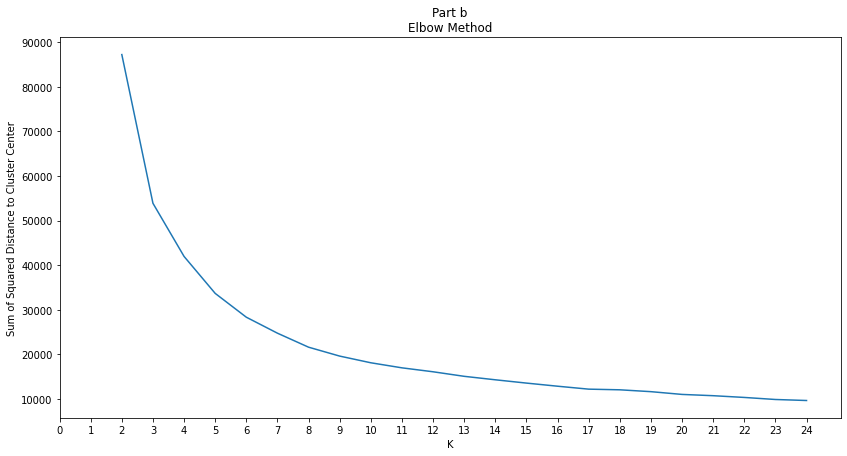

In [18]:
#elbow method
fig = plt.figure(figsize=(14,7))
plt.plot(np.arange(2,25,1), distortions_rand)
plt.xlabel('K')
plt.ylabel('Sum of Squared Distance to Cluster Center')
plt.xticks(np.arange(0,25,1))
plt.title('Part b\nElbow Method')
plt.show()

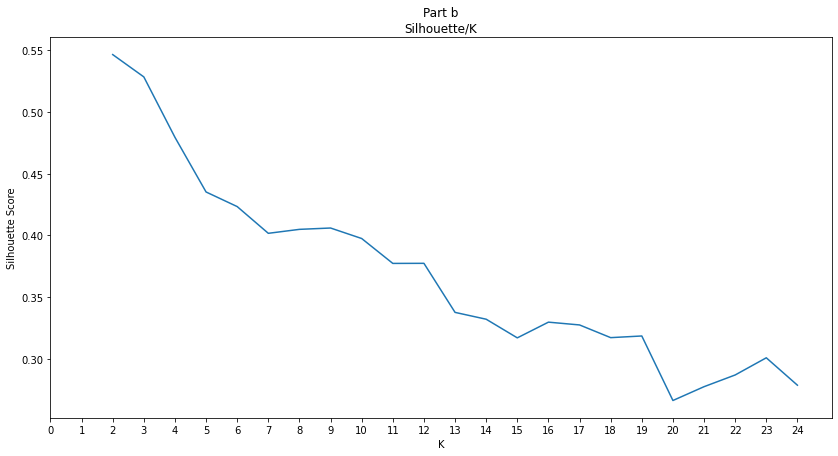

In [13]:
#silhouette score
fig = plt.figure(figsize=(14,7))
plt.plot(np.arange(2,25,1), sil_rand)
plt.title('Part b\nSilhouette/K')
plt.xticks(np.arange(0,25,1))
plt.ylabel('Silhouette Score')
plt.xlabel('K')
plt.show()

In [15]:
best_k_rand = 3

## c.

In [19]:
#chosen model
kmeans_rand = KMeans(n_clusters=best_k_rand, init='random', random_state=0)
pred_rand = kmeans_rand.fit_predict(df_best)

In [20]:
centroids_rand = kmeans_rand.cluster_centers_
silhouette_rand = silhouette_score(kmeans_rand.transform(df_best),kmeans_rand.predict(df_best))

In [25]:
print('Part c, Centroids:\n', centroids_rand)
print('Part c, Silhouette:\n',silhouette_rand)

Part c, Centroids:
 [[4.23871766e-02 1.00976663e-02 9.64347110e-03 8.69160584e+00
  8.34827940e-03 1.32495969e-02 6.66058394e-01 3.71532847e+00
  4.14316504e-03 7.57299270e-01]
 [2.72241502e-02 7.90387219e-03 7.93094910e-03 1.86112335e+01
  6.50006705e-03 5.85648443e-03 2.31387665e+00 8.22797357e+00
  2.57026244e-03 2.32599119e+00]
 [1.29451082e-02 4.11012977e-03 3.66931079e-03 2.93676662e+01
  4.20179500e-03 2.71340720e-03 5.35202086e+00 1.01486310e+01
  1.28188620e-03 5.53715776e+00]]
Part c, Silhouette:
 0.5282006367866574


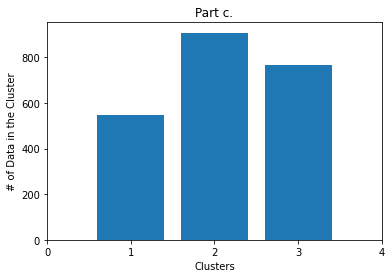

In [27]:
#counted the number of points in each cluster
amount = list()
for i in range(best_k_rand):
    current_cluster = df_best.iloc[np.where(pred_rand==i)[0]].reset_index(drop=True)
    amount.append(current_cluster.shape[0])
plt.bar(np.arange(1, best_k_rand+1, 1), amount)
plt.xticks(np.arange(0, best_k_rand+2, 1))
plt.title('Part c.')
plt.xlabel('Clusters')
plt.ylabel('# of Data in the Cluster')
plt.show()

## d.

In [32]:
#calculating kmeans++ score for different 'k's
sil_plus = list()
distortions_plus = list()
for k in range(2,25):
    kmeans_plus = KMeans(n_clusters=k, init='k-means++', random_state=0).fit(df_best)
    sil_plus.append(silhouette_score(kmeans_plus.transform(df_best),kmeans_plus.predict(df_best)))
    distortions_plus.append(kmeans_plus.inertia_)

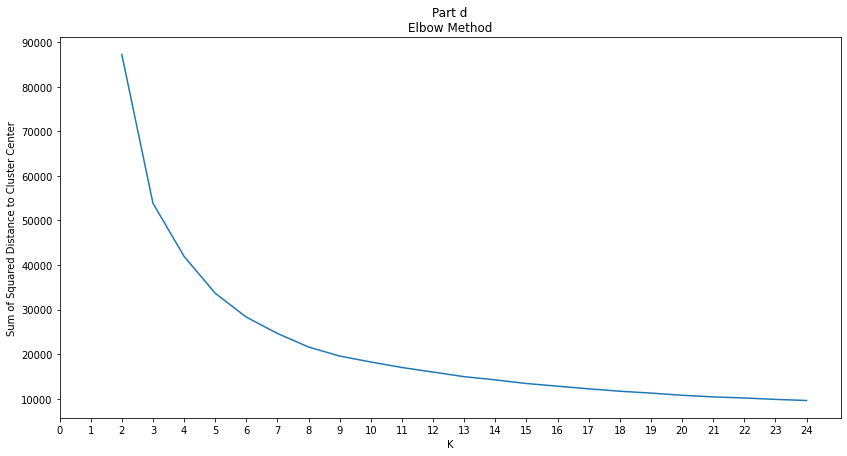

In [33]:
#elbow method for kmeans++
fig = plt.figure(figsize=(14,7))
plt.plot(np.arange(2,25,1), distortions_plus)
plt.xlabel('K')
plt.ylabel('Sum of Squared Distance to Cluster Center')
plt.xticks(np.arange(0,25,1))
plt.title('Part d\nElbow Method')
plt.show()

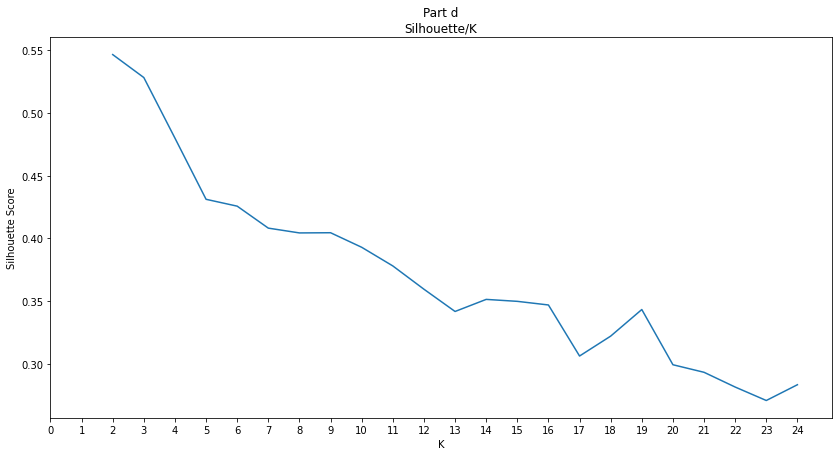

In [34]:
#silhouette score for kmeans++
fig = plt.figure(figsize=(14,7))
plt.plot(np.arange(2,25,1), sil_plus)
plt.title('Part d\nSilhouette/K')
plt.xticks(np.arange(0,25,1))
plt.ylabel('Silhouette Score')
plt.xlabel('K')
plt.show()

In [35]:
best_k_plus = 3

## e.

In [36]:
#chosen kmeans++ model
kmeans_plus = KMeans(n_clusters=best_k_plus, init='k-means++', random_state=0).fit(df_best)

In [37]:
centroids_plus = kmeans_plus.cluster_centers_
silhouette_plus = silhouette_score(kmeans_plus.transform(df_best),kmeans_plus.predict(df_best))

In [38]:
print('Part e, Centroids:\n', centroids_plus)
print('Part e, Silhouette:\n', silhouette_plus)

Part e, Centroids:
 [[2.72241502e-02 7.90387219e-03 7.93094910e-03 1.86112335e+01
  6.50006705e-03 5.85648443e-03 2.31387665e+00 8.22797357e+00
  2.57026244e-03 2.32599119e+00]
 [4.23871766e-02 1.00976663e-02 9.64347110e-03 8.69160584e+00
  8.34827940e-03 1.32495969e-02 6.66058394e-01 3.71532847e+00
  4.14316504e-03 7.57299270e-01]
 [1.29451082e-02 4.11012977e-03 3.66931079e-03 2.93676662e+01
  4.20179500e-03 2.71340720e-03 5.35202086e+00 1.01486310e+01
  1.28188620e-03 5.53715776e+00]]
Part e, Silhouette:
 0.5282006367867924


## f.

## Hierarchical Clustering

In [62]:
#plotting silhouette function
def silhouette_plot(n_clusters, method):
    #the model
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
    cluster_labels = clusterer.fit_predict(df_best)
    #average silhouette score
    silhouette_avg = silhouette_score(df_best, cluster_labels)
    print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
    #silhouette score for each sample
    sample_silhouette_values = silhouette_samples(df_best, cluster_labels)
    #plotting silhouette
    fig, ax1 = plt.subplots()
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

In [54]:
#plotting dendogram function
def dendogram_plot(method):
    Z = linkage(df_best, method=method)
    fig = plt.figure(figsize=(25, 10))
    plt.title(method + ' Linkage')
    plt.xlabel('Data')
    plt.ylabel('Distance')
    dn = dendrogram(Z)
    plt.show()

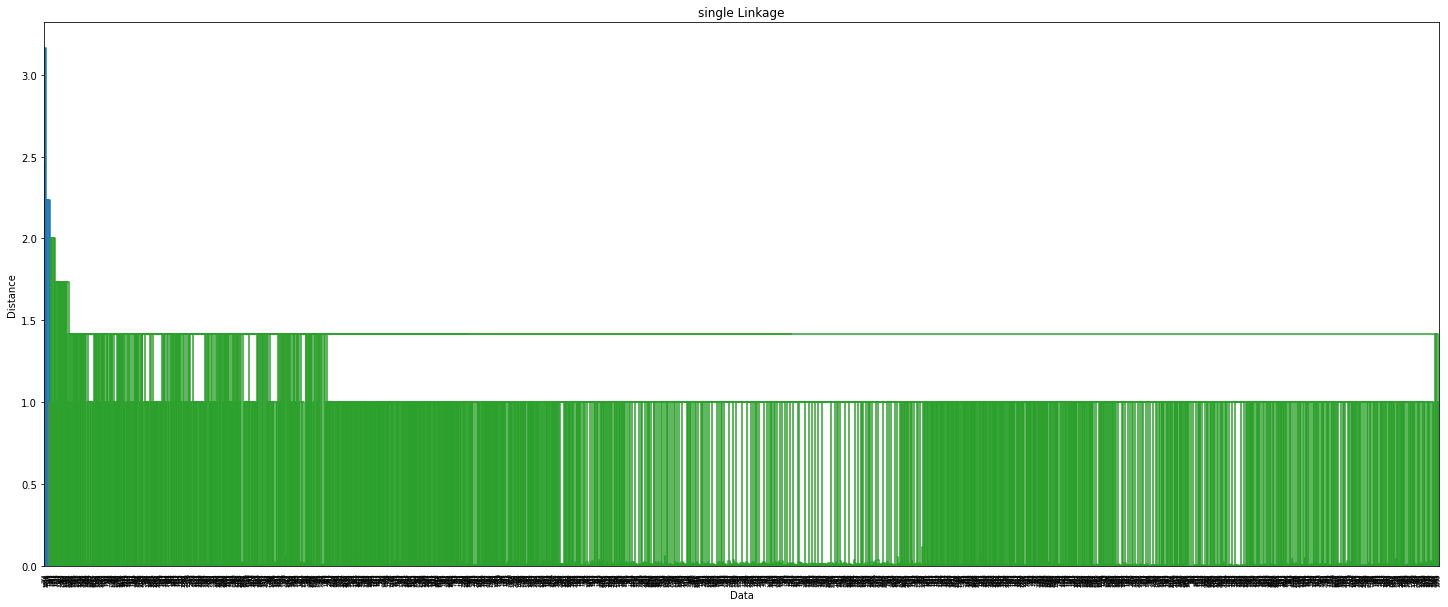

In [55]:
dendogram_plot('single')

For n_clusters = 2 The average silhouette_score is : -0.015897276670669428


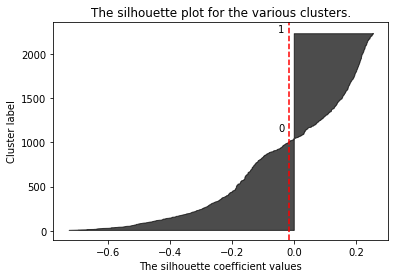

In [57]:
silhouette_plot(2, 'single')

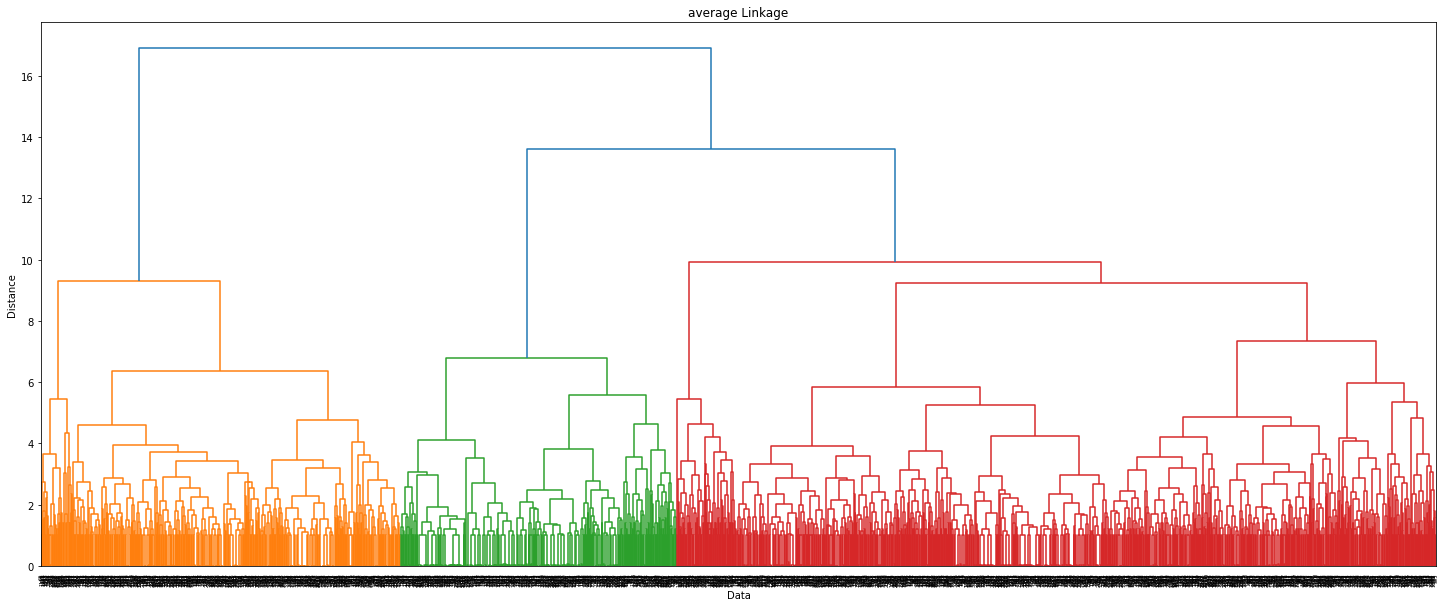

In [58]:
dendogram_plot('average')

For n_clusters = 2 The average silhouette_score is : 0.42206597911651156


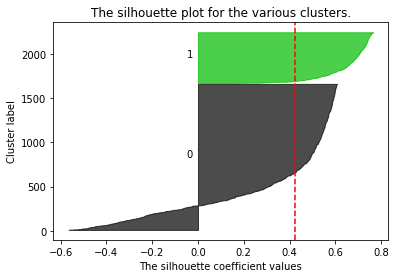

In [59]:
silhouette_plot(2, 'average')

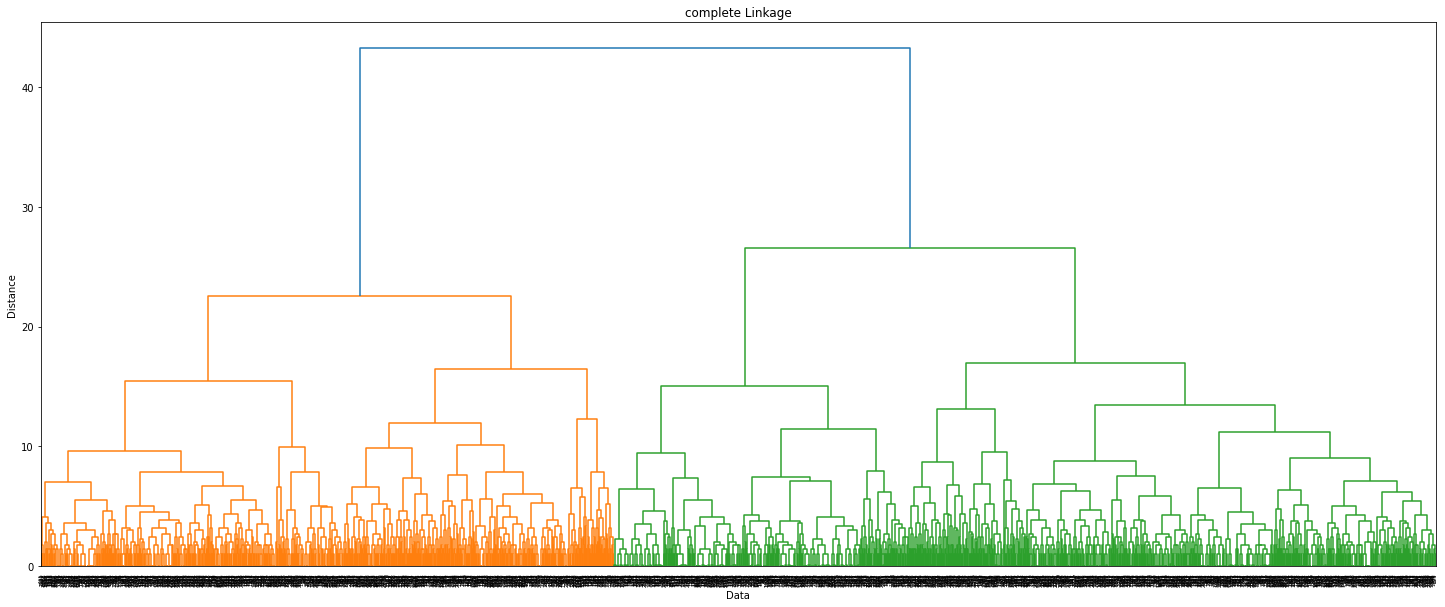

In [60]:
dendogram_plot('complete')

For n_clusters = 2 The average silhouette_score is : 0.4736813820725446


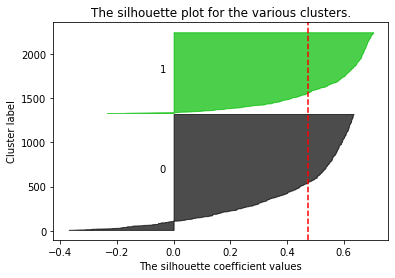

In [61]:
silhouette_plot(2, 'complete')